# Import Libraries

In [40]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import stats 
from scipy.stats import pearsonr
from scipy.stats.stats import pearsonr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data Preprocessing

In [41]:
#Reading csv file for salaries
salaries = pd.read_csv("salary.csv")
salaries.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


# Data cleaning

In [42]:
#dataframe shape
salaries.shape

(514, 11)

In [43]:
#Checking columns and missing values
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


In [44]:
salaries_df = salaries.dropna(axis = 0 ,inplace = True)
salaries_df

# 1.EDA

In [45]:
#Data summary
salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
salary,513.0,50863.220098,12685.132358,29000.00,40000.00,50096.00,60345.00,96156.00
exprior,513.0,2.931774,4.794327,0.00,0.00,1.00,4.00,25.00
yearsworked,513.0,12.836257,9.447040,0.00,4.00,12.00,22.00,41.00
yearsrank,513.0,7.046784,6.419708,0.00,2.00,5.00,12.00,28.00
market,513.0,0.948558,0.149524,0.71,0.84,0.92,1.02,1.33
degree,513.0,0.964912,0.184181,0.00,1.00,1.00,1.00,1.00
otherqual,513.0,0.044834,0.207142,0.00,0.00,0.00,0.00,1.00
position,513.0,2.130604,0.819977,1.00,1.00,2.00,3.00,3.00
male,513.0,0.750487,0.433153,0.00,1.00,1.00,1.00,1.00
Field,513.0,2.526316,1.126644,1.00,2.00,3.00,4.00,4.00


In [46]:
#Checking columns and their datatypes
salaries.columns.to_series().groupby(salaries.dtypes).groups

{dtype('int64'): Index(['exprior', 'yearsworked', 'yearsrank', 'degree', 'otherqual',
        'position', 'male', 'Field', 'yearsabs'],
       dtype='object'),
 dtype('float64'): Index(['salary', 'market'], dtype='object')}

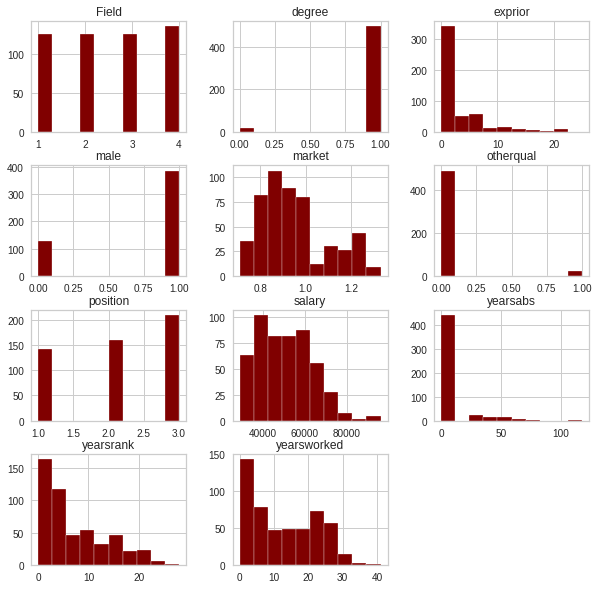

In [47]:
# Visualizing Histrograms
salaries.hist(figsize =(10, 10), color = "maroon");
_= plt.show()


•Many histograms are tail-heavy meaning several distributions are right-skewed (e.g.exprior,market,salary,yerasrank and yearsworked).

•Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

•Field has a normal distribution,looks like the mean and median are almost equal.

•While position,degree and male look like left-skewed distribution.

<Figure size 2520x2520 with 0 Axes>

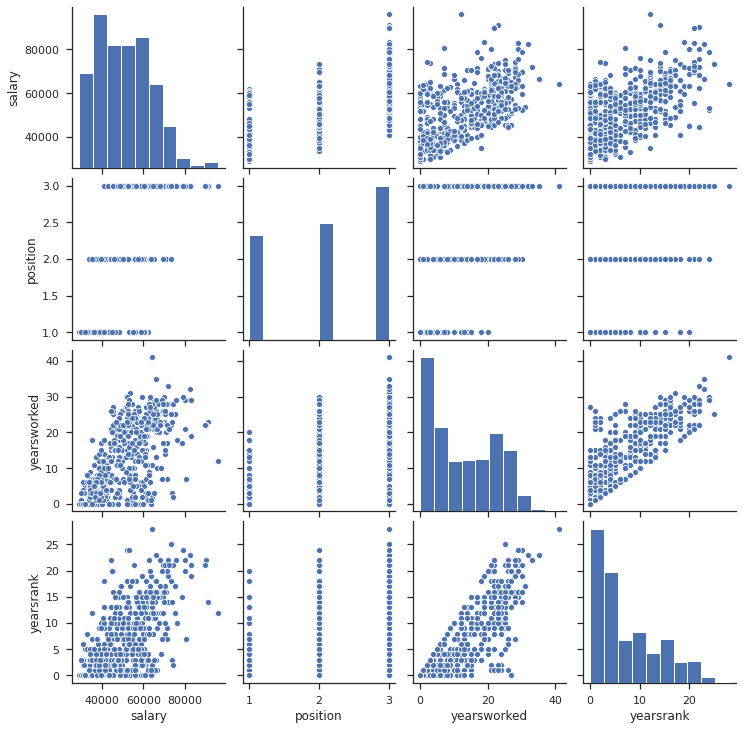

In [48]:
# Visualising data using pairplots
sns.set(style="ticks", color_codes=True)
plt.figure(figsize = (35,35))
sns.pairplot(salaries[["salary","position","yearsworked","yearsrank"]]);
_=plt.show();

•Looking at the scatter plot it is clear that there is a positive strong(moderate) relationship between salary and yearsworked and yearsrank.

•Position has a strong positive relationship with salary but it is not a linear relationship.

•The above graph show that there is multicollinearity,meaning there is a high correlation between the independent variables. 



In [49]:
#Checking the relatioships 
salaries.corr()["salary"]

salary         1.000000
exprior        0.119989
yearsworked    0.623589
yearsrank      0.610706
market         0.407214
degree         0.044554
otherqual      0.167137
position       0.702122
male           0.361564
Field         -0.499316
yearsabs      -0.069630
Name: salary, dtype: float64

•Position has a positive strong relationship with salary.

•Yearworked and yearsrank have a moderate relationship with salary because the corr is more than +0.5

•Lastly Field has a weak negative relationship with salary.

# 2.OneHot Encoding

In [50]:
#Reading Salary metadat csv file to see Explanation to create dictionaries
salary = pd.read_csv("Salary metadata.csv", delimiter = ";")
salary

,Variable,Type,Explanation
0,salary,Continuous,Annual salary in dollars
1,exprior,Continuous,Years of experience prior to working in this f...
2,yearsworked,Continuous,Years worked in this field
3,yearsrank,Continuous,Years worked at current rank
4,market,Continuous,Market value (1 = salary at market value for p...
5,degree,Binary,"Has degree (0 = no, 1 = yes)"
6,otherqual,Binary,Has other post-secondary qualification (0 = no...
7,position,Categorical,"Position (1 = Junior Employee, 2 = Manager, 3 ..."
8,male,Binary,"0 = no, 1 = yes"
9,Field,Categorical,"Field of work (1 = Engineering, 2 = Finance, 3..."


In [51]:
#Creating dummies for field and renaming columns
field_df = pd.get_dummies(salaries.Field)
field_df = field_df.rename(columns={1: "Engineering", 2: "Finance",
                                3:"Human Resources", 4: "Marketing"})

field_df.head()

,Engineering,Finance,Human Resources,Marketing
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,0,0,1


In [52]:
#merging original dataframe with dummies
merged_df = pd.concat([salaries, field_df], axis=1)
merged_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1


In [53]:
#Droping unnecessary columns
salaries_df = merged_df.drop(["exprior","market","degree","otherqual",
                               "male","Field","yearsabs"], axis = 1)
salaries_df.head()

,salary,yearsworked,yearsrank,position,Engineering,Finance,Human Resources,Marketing
0,53000.0,0,0,1,0,0,1,0
1,58000.0,0,0,1,0,1,0,0
2,45500.0,0,0,1,0,0,1,0
3,35782.0,2,1,1,0,0,0,1
4,34731.0,2,2,1,0,0,0,1


# 3.Correlation and statistical significance analysis 

### Hypothesis Testing :

•Null Hypothesis :  The relationship(correlation) between salary and yearsworked,yearsrank and position has no significance

•Alternate Hypothesis : The relationship(correlation) between salary and yearsworked,yearsrank and position has significance.

In [54]:
pearsonr(salaries_df.yearsrank,salaries_df.salary)

(0.6107063176375227, 9.307173080331551e-54)

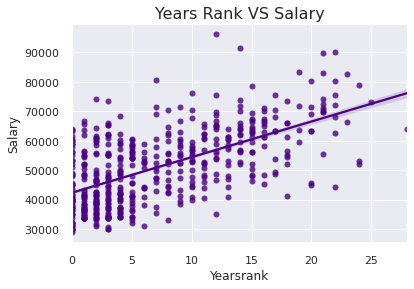

In [55]:
sns.set()
plt.figure(figsize = (6,4))
sns.regplot(data = salaries_df, x = salaries_df.yearsrank, 
            y =salaries["salary"],ci = 68,color = "indigo")
plt.xlabel("Yearsrank", fontsize = 12)
plt.ylabel("Salary", fontsize = 12 )
_= plt.title("Years Rank VS Salary", fontsize = 16)

•Looking at the p-values and the regression plot for yearsrank we reject the null hypothesis because there is a linear relationship between salary and yearsrank.

In [56]:
pearsonr(salaries_df.yearsworked,salaries_df.salary)

(0.6235888657598048, 1.2873351342916404e-56)

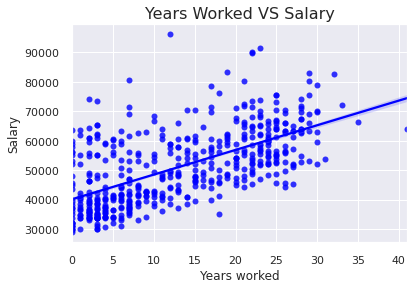

In [57]:
sns.set()
plt.figure(figsize = (6,4))
sns.regplot(data = salaries_df, x = salaries_df["yearsworked"],
            y =salaries_df["salary"],ci = 68,color = "blue")
plt.xlabel("Years worked", fontsize = 12)
plt.ylabel("Salary", fontsize = 12 )
_= plt.title("Years Worked VS Salary", fontsize = 16)

•Looking at the p-values and the regression plot for yearsworked we reject the null hypothesis because there is a linear relationship between salary and yearsworked.

In [58]:
pearsonr(salaries.position,salaries_df.salary)

(0.7021217379212221, 2.164001495311446e-77)

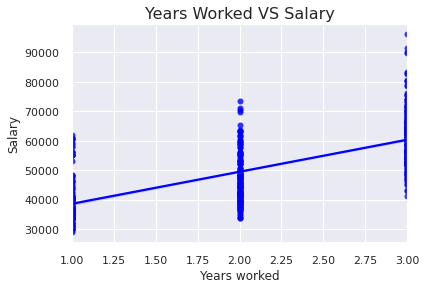

In [59]:
sns.set()
plt.figure(figsize = (6,4))
sns.regplot(data = salaries_df, x = salaries_df["position"],
            y =salaries_df["salary"],ci = 68,color = "blue")
plt.xlabel("Years worked", fontsize = 12)
plt.ylabel("Salary", fontsize = 12 )
_= plt.title("Years Worked VS Salary", fontsize = 16)

•The above graph shows that there is correlation between position and salary eventhough it looks like a bar graph but it is a regression plot because it is a categorical data.



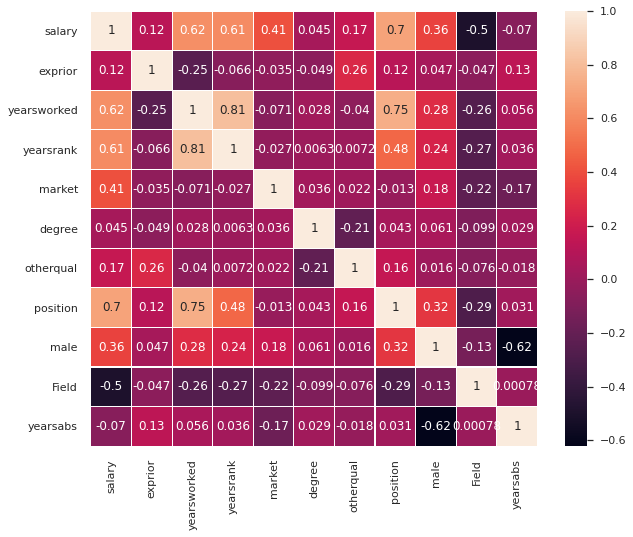

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(salaries.corr(), annot=True, linewidth=0.1)


In [61]:
#Calculating the Vsariance Inflation Factor

VIF = pd.Series([variance_inflation_factor(salaries_df.values, x) 
               for x in range(salaries_df.shape[1])], 
              index=salaries_df.columns)

VIF 

salary              3.318476
yearsworked         5.974216
yearsrank           4.095691
position            3.741467
Engineering        10.753947
Finance             9.350817
Human Resources     5.883150
Marketing           7.391770
dtype: float64

•The VIF for Field(Engineering) is very high it indicates multicollinearity.

•The VIF for yearsworked,finance,HR and marketing are high there is multicollinearity.

•The VIF for salary,yearsrank and position are moderate correlation but they don't affect the results.

#### Hypothesis Testing


•Null hypothesis:Multicollinearity is not significant.

•Alternate Hypothesis:Multicollinearity is significant.



In [62]:
print(f'p-values between yearsworked and yearsrank = {stats.pearsonr(salaries.yearsworked, salaries.yearsrank)}')
print(f'p-values between yearsrank and position = {stats.pearsonr(salaries.yearsrank, salaries.position)}')
print(f'p-values between postion and years-worked = {stats.pearsonr(salaries.position, salaries.yearsworked)}')

p-values between yearsworked and yearsrank = (0.8134557540055776, 2.344473658281649e-122)
p-values between yearsrank and position = (0.4848908290210395, 1.3103248811040993e-31)
p-values between postion and years-worked = (0.7463112666910758, 2.1625240174385954e-92)


•The above p-values show that there is multicollinearity,meaning there is a high correlation between the independent variables.I reject my null hyphothesis and and say that multicollinearity of these characteristics is significant.The p-value is above the threshold 0.05 


In [63]:
#Creating training and testing target

X = salaries_df[["yearsworked","yearsrank"]]
X = sm.add_constant(X)
y = salaries_df.salary

#Splitting traring and testing
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(410, 3) (103, 3) (410,) (103,)


In [64]:
#checking to see if training set has any null values
np.any(np.isnan(X_train))

False

In [65]:
#checking to see if testing set has any null values
np.any(np.isnan(y_train))

False

In [66]:
# create a train model in one line
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)

In [67]:
#model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     164.3
Date:                Tue, 12 May 2020   Prob (F-statistic):           4.89e-53
Time:                        11:15:27   Log-Likelihood:                -4335.8
No. Observations:                 410   AIC:                             8678.
Df Residuals:                     407   BIC:                             8690.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const            4e+04    790.997     50.572      0.000    3.84e+04    4.16e+04
yearsworked   534.8019     83.132      6.433      0.000     371.380     698.224
yearsrank     605.7156    121.443      4.988      0.000     366.982     844.449
==============================================================================
Omnibus:                       35.691   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.539
Skew:                           0.771   Prob(JB):                     5.79e-10
Kurtosis:                       3.339   Cond. No.                         30.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

•The model does significantly predict the dependant variable as the R^2 value is 0.447, which shows moderate accuracy.

•44.7% of employees’ salaries is accounted for by our independant variables(yearsworked, yearsrank and positon)

In [68]:
#coeff
model.params

const          40002.323460
yearsworked      534.801851
yearsrank        605.715619
dtype: float64

In [69]:
#finding regression score
lr = LinearRegression().fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
lr.score(X_train, y_train)



0.4467190276731644

In [70]:
#Calculating Rmse of training ad testing
rmse_train = rmse(y_train, model.predict(X_train))
rmse_test = rmse(y_test, model.predict(X_test))
print("Train RMSE = ",rmse_train)
print("Test RMSE = ",rmse_test)

Train RMSE =  9473.427361556602
Test RMSE =  10350.06554594263


In [71]:
# diff
rmse_diff = rmse_test - rmse_train
rmse_diff

876.638184386029

 •Looking at the RMSE scores there are no signs of overfitting or underfitting. The test is higer than the train values which makes sense as the model should be more accurate in predicting values it has already seen in the training set.

In [72]:
residual = y_test - predictions
residual.head()

305   -14073.017778
497    -8751.146049
440    -5858.204441
153    -1861.540115
499    -6988.334865
dtype: float64

In [73]:
#Creating a dataframe for residuals
predict = pd.concat([X_test, y_test, predictions], axis=1)
predict.rename(columns={0: "Predictions"}, inplace=True)
predict["Residual"] = predict["salary"] - predict["Predictions"]
predict.head()

,const,yearsworked,yearsrank,salary,Predictions,Residual
305,1.0,24,16,48456.0,62529.017778,-14073.017778
497,1.0,19,12,48681.0,57432.146049,-8751.146049
440,1.0,10,4,41915.0,47773.204441,-5858.204441
153,1.0,9,0,42954.0,44815.540115,-1861.540115
499,1.0,18,5,45669.0,52657.334865,-6988.334865


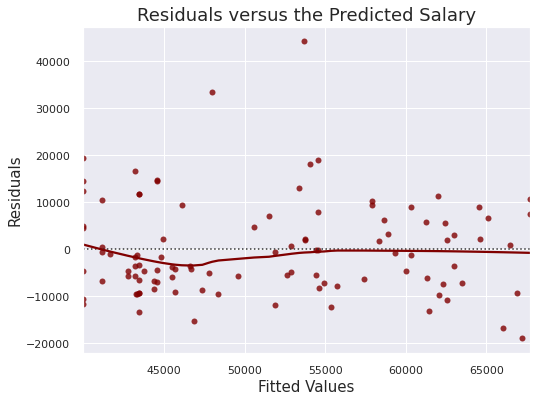

In [74]:
#A residuals plot
plt.figure(figsize=(8,6))
sns.set()
sns.residplot(x = predictions, y = residual, lowess=True, color = "maroon")
plt.title("Residuals versus the Predicted Salary",fontsize = 18)
plt.xlabel("Fitted Values",fontsize = 15)
plt.ylabel("Residuals",fontsize = 15);

In [75]:
#Fitting test model
model_test = sm.OLS(y_test, X_test).fit()


In [76]:
#Model summary
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     24.35
Date:                Tue, 12 May 2020   Prob (F-statistic):           2.42e-09
Time:                        11:15:31   Log-Likelihood:                -1096.4
No. Observations:                 103   AIC:                             2199.
Df Residuals:                     100   BIC:                             2207.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.071e+04   1729.663     23.538      0.000    3.73e+04    4.41e+04
yearsworked   360.5386    214.303      1.682      0.096     -64.632     785.709
yearsrank     633.1627    325.177      1.947      0.054     -11.980    1278.305
==============================================================================
Omnibus:                       29.098   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.761
Skew:                           1.170   Prob(JB):                     3.49e-12
Kurtosis:                       5.611   Cond. No.                         31.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

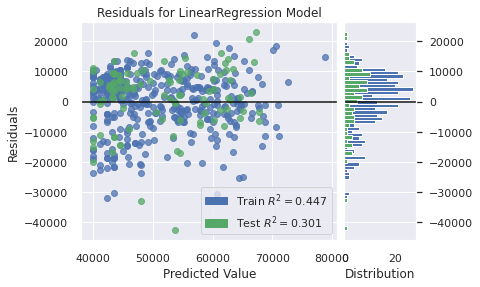

In [77]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()



This seems to be a good model since it has satisfied the following linear regression assumptions:

    •It has Linear relationship
    •It has no auto-correlation
    •It has no multicollinearity
    •It has multivariate normality  